In [ ]:
import pandas as pd

file_path = '/content/balanced_copopsofinaldataset_new1.csv'
df = pd.read_csv(file_path)

columns = df.columns

print("Column Names:", columns)

Column Names: Index(['Course Identifier', 'CO Identifier', 'CO Description',
       'PO/PSO Identifier', 'PO/PSO Description', 'Score (0-3)'],
      dtype='object')


Epoch 1/1, Train Acc: 0.8104, Train Precision: 0.8129, Train Recall: 0.8104, Train F1: 0.8098, Valid Acc: 0.7911, Valid Precision: 0.7946, Valid Recall: 0.7911, Valid F1: 0.7898


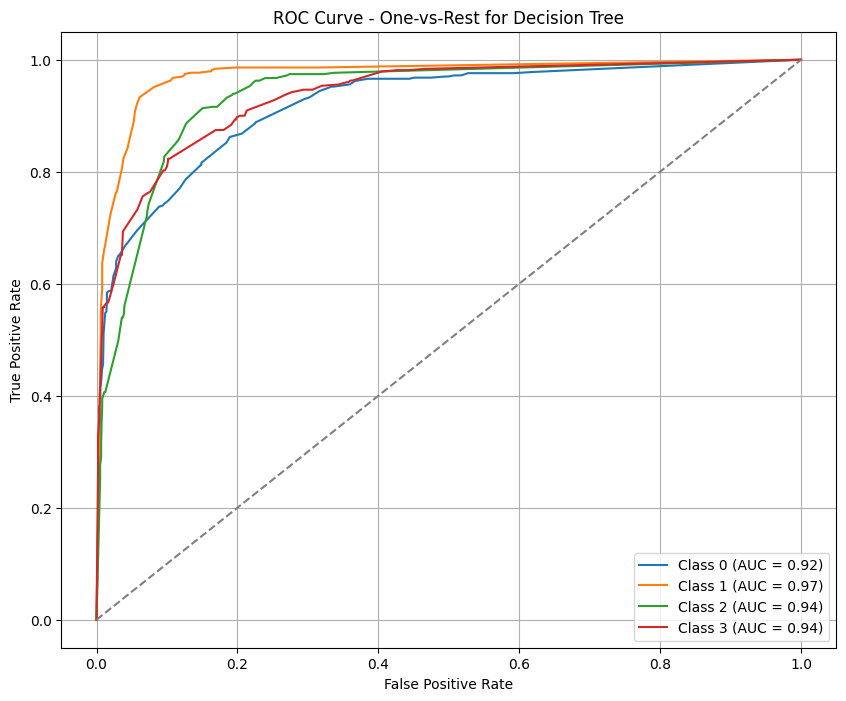

In [ ]:
# DESISION TREE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

file_path = '/content/balanced_copopsofinaldataset_new1.csv'
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
df['CO Description'] = label_encoder.fit_transform(df['CO Description'])
df['PO/PSO Description'] = label_encoder.fit_transform(df['PO/PSO Description'])

X = df[['CO Description', 'PO/PSO Description']]
y = df['Score (0-3)']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_valid_pred = dt_model.predict(X_valid)

train_acc = accuracy_score(y_train, y_train_pred)
valid_acc = accuracy_score(y_valid, y_valid_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
valid_precision = precision_score(y_valid, y_valid_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
valid_recall = recall_score(y_valid, y_valid_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')

epoch = 0
epochs = 1
print(f'Epoch {epoch + 1}/{epochs}, '
      f'Train Acc: {train_acc:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, '
      f'Valid Acc: {valid_acc:.4f}, Valid Precision: {valid_precision:.4f}, '
      f'Valid Recall: {valid_recall:.4f}, Valid F1: {valid_f1:.4f}')

lb = LabelBinarizer()
y_valid_bin = lb.fit_transform(y_valid)
y_train_bin = lb.transform(y_train)

y_valid_prob = dt_model.predict_proba(X_valid)
y_train_prob = dt_model.predict_proba(X_train)

n_classes = len(lb.classes_)
fpr, tpr, auc_scores = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_valid_prob[:, i])
    auc_scores[i] = roc_auc_score(y_valid_bin[:, i], y_valid_prob[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - One-vs-Rest for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Epoch 1/1, Train Acc: 0.9303, Train Precision: 0.9302, Train Recall: 0.9303, Train F1: 0.9301, Valid Acc: 0.8793, Valid Precision: 0.8789, Valid Recall: 0.8793, Valid F1: 0.8790


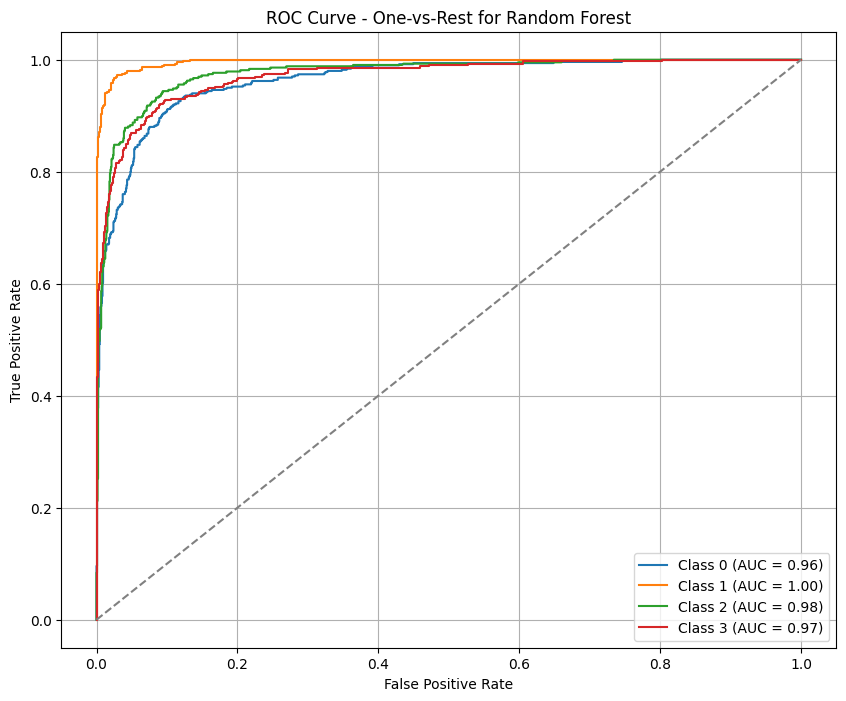

In [ ]:
# RANDOM FOREST
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import matplotlib.pyplot as plt

file_path = '/content/balanced_copopsofinaldataset_new1.csv'
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
df['CO Description'] = label_encoder.fit_transform(df['CO Description'])
df['PO/PSO Description'] = label_encoder.fit_transform(df['PO/PSO Description'])

X = df[['CO Description', 'PO/PSO Description']]
y = df['Score (0-3)']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_valid_pred = rf_model.predict(X_valid)

train_acc = accuracy_score(y_train, y_train_pred)
valid_acc = accuracy_score(y_valid, y_valid_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
valid_precision = precision_score(y_valid, y_valid_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
valid_recall = recall_score(y_valid, y_valid_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')

epoch = 0
epochs = 1
print(f'Epoch {epoch + 1}/{epochs}, '
      f'Train Acc: {train_acc:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, '
      f'Valid Acc: {valid_acc:.4f}, Valid Precision: {valid_precision:.4f}, '
      f'Valid Recall: {valid_recall:.4f}, Valid F1: {valid_f1:.4f}')

lb = LabelBinarizer()
y_valid_bin = lb.fit_transform(y_valid)
y_train_bin = lb.transform(y_train)

y_valid_prob = rf_model.predict_proba(X_valid)
y_train_prob = rf_model.predict_proba(X_train)

n_classes = len(lb.classes_)
fpr, tpr, auc_scores = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_valid_prob[:, i])
    auc_scores[i] = roc_auc_score(y_valid_bin[:, i], y_valid_prob[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - One-vs-Rest for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Epoch 1/1, Train Acc: 0.8994, Train Precision: 0.8998, Train Recall: 0.8994, Train F1: 0.8991, Valid Acc: 0.8642, Valid Precision: 0.8642, Valid Recall: 0.8642, Valid F1: 0.8637


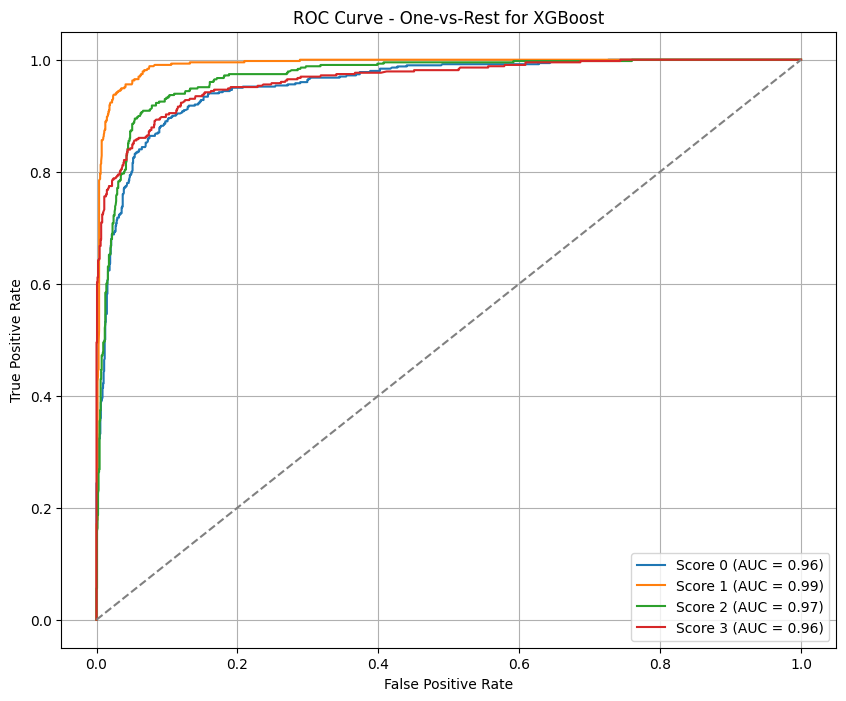

In [ ]:
#XGBOOST
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import xgboost as xgb
import matplotlib.pyplot as plt

file_path = '/content/balanced_copopsofinaldataset_new1.csv'
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
df['CO Description'] = label_encoder.fit_transform(df['CO Description'])
df['PO/PSO Description'] = label_encoder.fit_transform(df['PO/PSO Description'])

X = df[['CO Description', 'PO/PSO Description']]
y = df['Score (0-3)']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_valid_pred = xgb_model.predict(X_valid)

train_acc = accuracy_score(y_train, y_train_pred)
valid_acc = accuracy_score(y_valid, y_valid_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
valid_precision = precision_score(y_valid, y_valid_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
valid_recall = recall_score(y_valid, y_valid_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')

epoch = 0
epochs = 1
print(f'Epoch {epoch + 1}/{epochs}, '
      f'Train Acc: {train_acc:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, '
      f'Valid Acc: {valid_acc:.4f}, Valid Precision: {valid_precision:.4f}, '
      f'Valid Recall: {valid_recall:.4f}, Valid F1: {valid_f1:.4f}')

lb = LabelBinarizer()
y_valid_bin = lb.fit_transform(y_valid)
y_train_bin = lb.transform(y_train)

y_valid_prob = xgb_model.predict_proba(X_valid)
y_train_prob = xgb_model.predict_proba(X_train)

n_classes = len(lb.classes_)
fpr, tpr, auc_scores = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_valid_prob[:, i])
    auc_scores[i] = roc_auc_score(y_valid_bin[:, i], y_valid_prob[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Score {i} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - One-vs-Rest for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

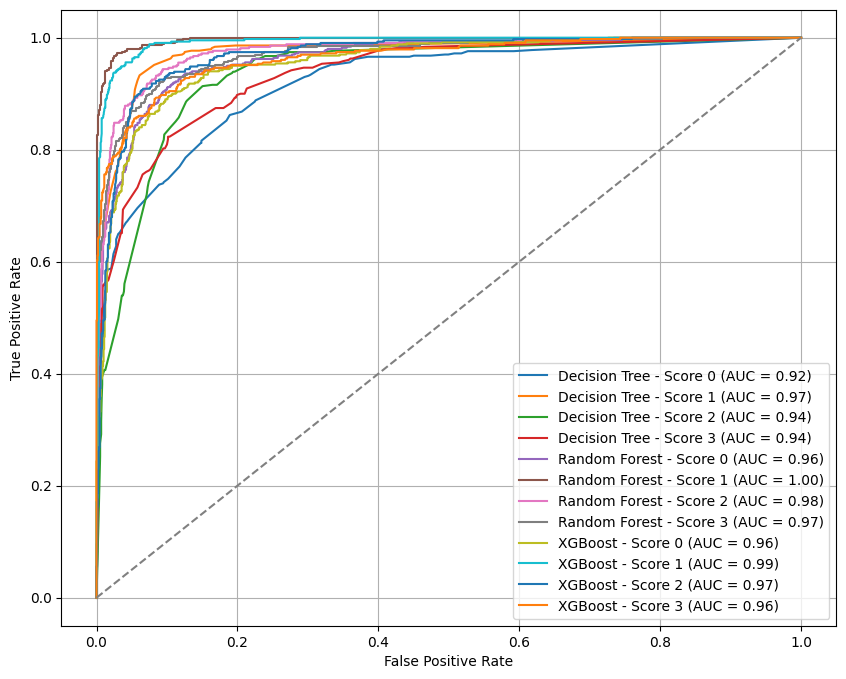

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

file_path = '/content/balanced_copopsofinaldataset_new1.csv'
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
df['CO Description'] = label_encoder.fit_transform(df['CO Description'])
df['PO/PSO Description'] = label_encoder.fit_transform(df['PO/PSO Description'])

X = df[['CO Description', 'PO/PSO Description']]
y = df['Score (0-3)']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    random_state=42
)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

y_valid_prob_dt = dt_model.predict_proba(X_valid)
y_valid_prob_rf = rf_model.predict_proba(X_valid)
y_valid_prob_xgb = xgb_model.predict_proba(X_valid)

lb = LabelBinarizer()
y_valid_bin = lb.fit_transform(y_valid)

n_classes = len(lb.classes_)
fpr, tpr, auc_scores = {}, {}, {}

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_valid_prob_dt[:, i])
    auc_scores[i] = roc_auc_score(y_valid_bin[:, i], y_valid_prob_dt[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Decision Tree - Score {i} (AUC = {auc_scores[i]:.2f})')

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_valid_prob_rf[:, i])
    auc_scores[i] = roc_auc_score(y_valid_bin[:, i], y_valid_prob_rf[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Random Forest - Score {i} (AUC = {auc_scores[i]:.2f})')

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_valid_prob_xgb[:, i])
    auc_scores[i] = roc_auc_score(y_valid_bin[:, i], y_valid_prob_xgb[:, i])
    plt.plot(fpr[i], tpr[i], label=f'XGBoost - Score {i} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

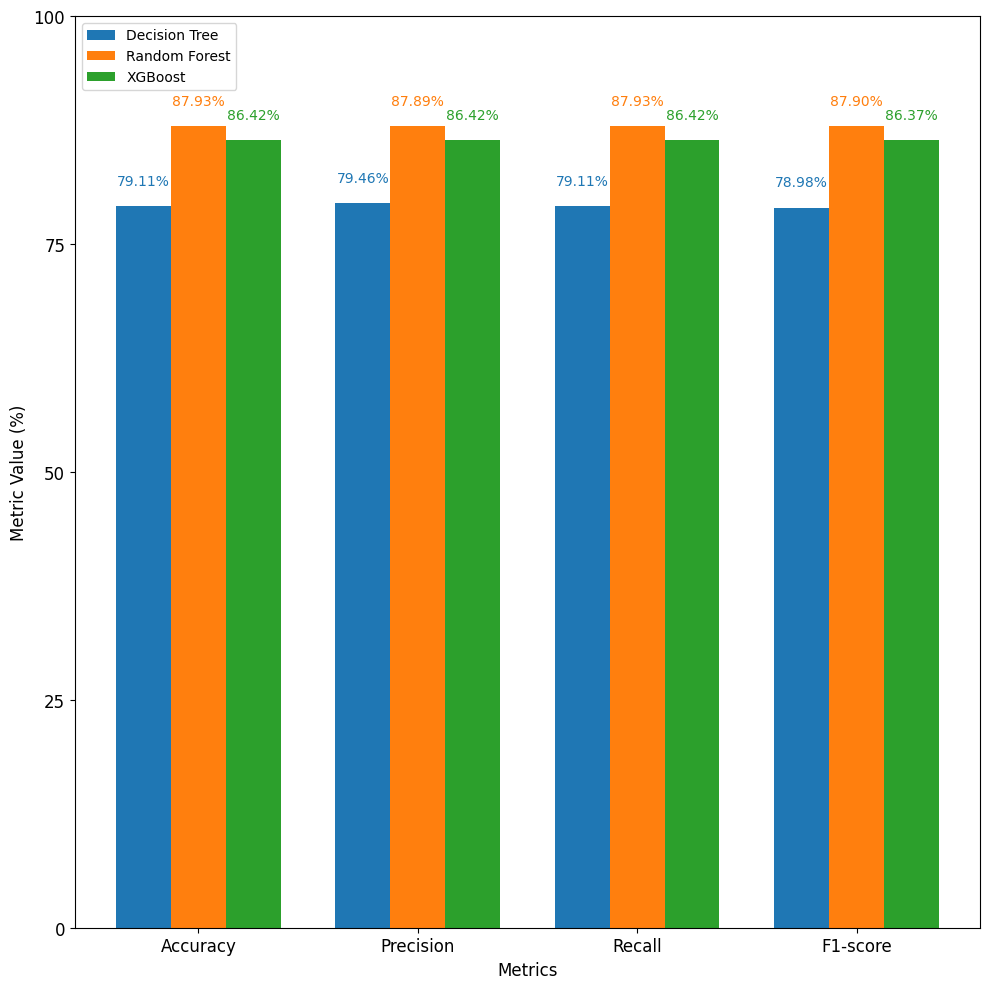

In [ ]:
# VISUALIZATION OF THE RESULT
import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Tree', 'Random Forest', 'XGBoost']

valid_metrics = {
    'Accuracy': 0.7911, 'Precision': 0.7946, 'Recall': 0.7911, 'F1-score': 0.7898
}

valid_rf = {
    'Accuracy': 0.8793, 'Precision': 0.8789, 'Recall': 0.8793, 'F1-score': 0.8790
}

valid_xgb = {
    'Accuracy': 0.8642, 'Precision': 0.8642, 'Recall': 0.8642, 'F1-score': 0.8637
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

valid_values = [
    [valid_metrics[metric] * 100, valid_rf[metric] * 100, valid_xgb[metric] * 100] for metric in metrics
]

x = np.arange(len(metrics))
bar_width = 0.25
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(10, 10))

for i, model in enumerate(models):
    bars = plt.bar(x + i * bar_width, [valid_values[j][i] for j in range(len(metrics))],
                   bar_width, label=model, color=colors[i])

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.2f}%',
                 ha='center', va='bottom', fontsize=10, color=colors[i])

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Metric Value (%)', fontsize=12)
plt.xticks(x + bar_width, metrics, fontsize=12)

plt.yticks(np.arange(0, 101, 25), fontsize=12)

plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()
